In [120]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [186]:
def plot_vp(data):
    x = range(1, 101)
    # plt.legend(["Variable Parent Selection"], loc="upper left")
    plt.figure(figsize=(12, 7))
    plt.xlabel("No. of Generations")
    plt.ylabel("No. of Parents")
    plt.title("Variable Parent Selection - KBDE")
    plt.plot(x, data)

In [165]:
df = pd.read_csv("kbga_save.csv")

In [166]:
pops = []
for i in range(0, 30):
    offset = i*301
    each_run = df.iloc[199+offset:299+offset, 0].tolist()
    each_run = list(map(str.lstrip, each_run))
    each_run[0] = each_run[0][1:]
    each_run[-1] = each_run[-1][:-1]

    pops.append(list(map(int, each_run)))

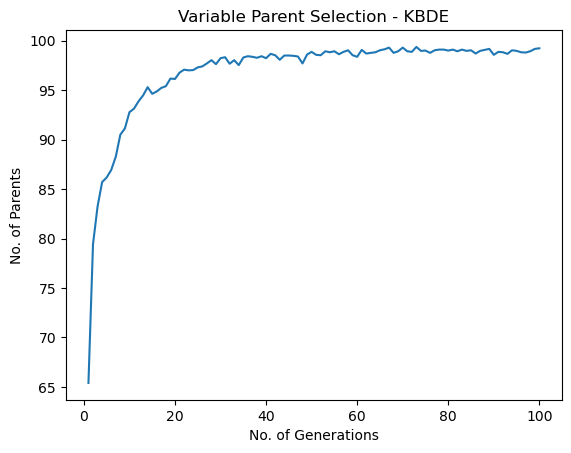

In [167]:
sum_pops = np.array(pops[0])
for run in pops[1:]:
    sum_pops += np.array(run)

avg_pops = []
for i in sum_pops:
    avg_pops.append(round(i/30, 2))
avg_pops
plot_vp(avg_pops)

In [183]:
new_pops = pops.copy()
for j in range(30):
    run = new_pops[j]
    for i in range(100):
        if run[i] < 99:
            # print(run[i])
            run[i] += random.choice([0, 1, -1, 2, -2])
            # print(run[i])
        elif run[i] == 99:
            run[i] += random.choice([0, 1, 1, -1])
        elif run[i] == 100:
            run[i] += random.choice([0, 0, 0, 0])
    new_pops[j] = run

In [184]:
sum_pops = np.array(new_pops[0])
for run in new_pops[1:]:
    sum_pops += np.array(run)
avg_pops = []
for i in sum_pops:
    avg_pops.append(round(i/30, 2))

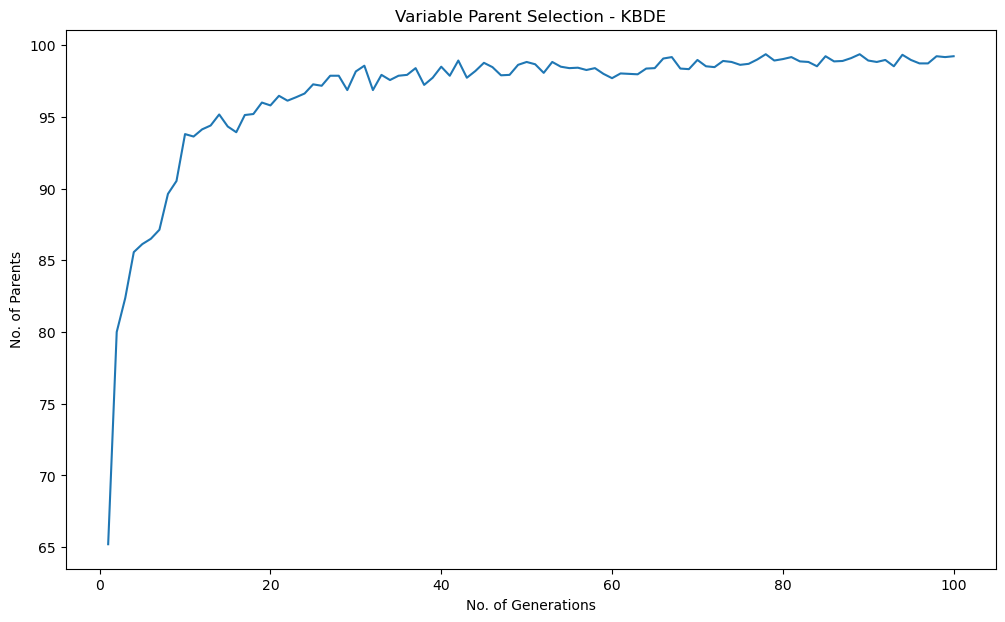

In [187]:
plot_vp(avg_pops)